In [1]:
# Import NumPy
import numpy as np

In [2]:
# Initialiize the Experience Matrices: 
# X is the features matrix (independent variables) 
# Y is the output matrix (dependent variable)

X = np.array([[1,2,0.5],[2,1,2],[1,2,1],[1,1,2]])
Y = np.array([[1, 0, 1]])

In [3]:
# Let us set up weights randomly
np.random.seed(500)
W = np.random.rand(4).reshape(1,4)
b = np.random.rand()
print("Weights: ", W)
print("Bias: ", b)

# Note that b is also a weight but called bias for reasons we will explore later
# Clearly, in case of Linear Regression, w's are slopes in different dimensions, 
# and b is the intercept at  intersection of the y-axis and the hypersurface. 

Weights:  [[0.69367953 0.06171699 0.6666116  0.55920894]]
Bias:  0.08511062291794402


### Assignment 1:

Write a function <b><i>ComputeDerivatives</i>( )</b> that takes X, Y, W, and b and returns derivatives dJdW and dJdb. Use matrix computation (stricly no loops). You can resue code from Linear Regression assignment of Week 1.  

<i> 
C = -2 (Y - (WX + b))  
dJdb = C U  
dJdW = C X<sup>T</sup>  
</i>

In [4]:
def ComputeDerivatives(X, Y, W, b):
#-- START CODE HERE --# (≈ 3-5 lines of code)
#     C = -2 * (Y - (np.dot(W,X) + b))
#     U = np.ones((3,1)) 
#     dJdW = np.dot(C, X.T)
#     dJdb = np.dot(C, U)
    temp = (Y-(W.dot(X)+b)) * -2
    dJdb = np.sum(temp)
    dJdW =  temp.dot(X.T) 
#-- END CODE HERE --#
    return (dJdW, dJdb)

In [5]:
# TESTING:

# Reset the weights
np.random.seed(500)
W = np.random.rand(4).reshape(1,4)
b = np.random.rand()

# Call the function ComputeDerivatives() with example data
ComputeDerivatives(X, Y, W, b)

(array([[17.30297838, 16.72707165, 18.64339223, 14.47098231]]),
 11.79015462508737)

##### You should get the following results:

(array([[17.30297838, 16.72707165, 18.64339223, 14.47098231]]),
 array([[11.79015463]]))

### Assignment 2:

Write a function <b><i>ComputeCostFunction</i>( )</b> to determine Cost Function for given X, Y, W, and b. Use following matrix relationship: 

𝐽(W, 𝑏)= [𝑌 - (𝑊𝑋+𝐵)] × [𝑌 - (𝑊𝑋+𝐵)]<sup>𝑇</sup>  
  


In [6]:
def ComputeCostFunction(X, Y, W, b):
#-- START CODE HERE --# (≈ 1-3 lines of code)
    first = (Y- (W.dot(X)+b))
    second = (Y- (W.dot(X)+b)).T
    J = first.dot(second)
    return J[0][0]
#-- END CODE HERE --#

In [7]:
# TESTING:

# Reset the weights
np.random.seed(500)
W = np.random.rand(4).reshape(1,4)
b = np.random.rand()

ComputeCostFunction(X, Y, W, b)

14.810910451361368

##### You should get the following result:

14.810910451361368

### Assignment 3:

Write a function <b><i>UpdateWeights</i>( )</b> that takes derivatives (dJdb and dJdW), current value of weights (W, b), and learning rate (alpha) to returns updated weights.

In [8]:
def UpdateWeights(W, b, dJdW, dJdb, alpha):
#-- START CODE HERE --# (≈ 2-4 lines of code)
    b = b - (alpha * dJdb)
    for x in range(len(dJdW[0])):
        W[0][x] += - alpha * dJdW[0][x] 
    return W, b
#-- END CODE HERE --#

In [9]:
# TESTING:

# Set learning rate
alpha = 0.01

# Get derivatives
dJdW, dJdb = ComputeDerivatives(X, Y, W, b)

# Reset the weights
np.random.seed(500)
W = np.random.rand(4).reshape(1,4)
b = np.random.rand()

UpdateWeights(W, b, dJdW, dJdb, alpha)

(array([[ 0.52064974, -0.10555372,  0.48017768,  0.41449911]]),
 -0.03279092333292967)

##### You should get the following result:

(array([[ 0.52064976, -0.1055537 ,  0.48017771,  0.41449916]]),
 array([[-0.0327909]]))

### Assignment 4:

Write code to call the above three functions iteratively till the change in Cost Function J is less than or equal to 9.63e-5. A list J has been initialized to store values of the Cost Function. Loop should be as the following:

- Compute the Cost Function and store in a variable Ji
- Define a variable Jf and set to 1
- Loop while difference of Jf - Ji is less than the threshold:
    - Compute the derivatives
    - Update the weights
    - Jf <- Ji
    - Compute the Cost Function and store in Ji
    - Append value of the Cost Function to the list J
 

In [ ]:
# Set Learning Rate
alpha = 0.001

# Reset the weights
np.random.seed(500)
W = np.random.rand(4).reshape(1,4)
b = np.random.rand()

# Initialize a list to store Cost Function values upon each iteration. 
J = []

#-- START CODE HERE --# (≈ 5-10 lines of code)
Ji = ComputeCostFunction(X, Y, W, b)
Jf = 1
n = abs(Ji-Jf)
while n >  0.0000963:
    dJdW, dJdb = ComputeDerivatives(X, Y, W, b)
    W, b = UpdateWeights(W, b, dJdW, dJdb, alpha)
    Jf = Ji
    Ji = ComputeCostFunction(X, Y, W, b)
    J.append(Ji)
#-- END CODE HERE --#

s = len(J)
print("Starting value of the Cost Function", J[0])
print("Ending value of the Cost Function", J[s-1])
print("Number of iterations: ", s)

##### You should get the following results:

Starting value of the Cost Function 13.568376522284288   
Ending value of the Cost Function 0.06277004664639105   
Number of iterations:  1000   


### Assignment 5:

Run the code below to plot the cost function:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(J)
plt.show()

##### The output should look like the following: 

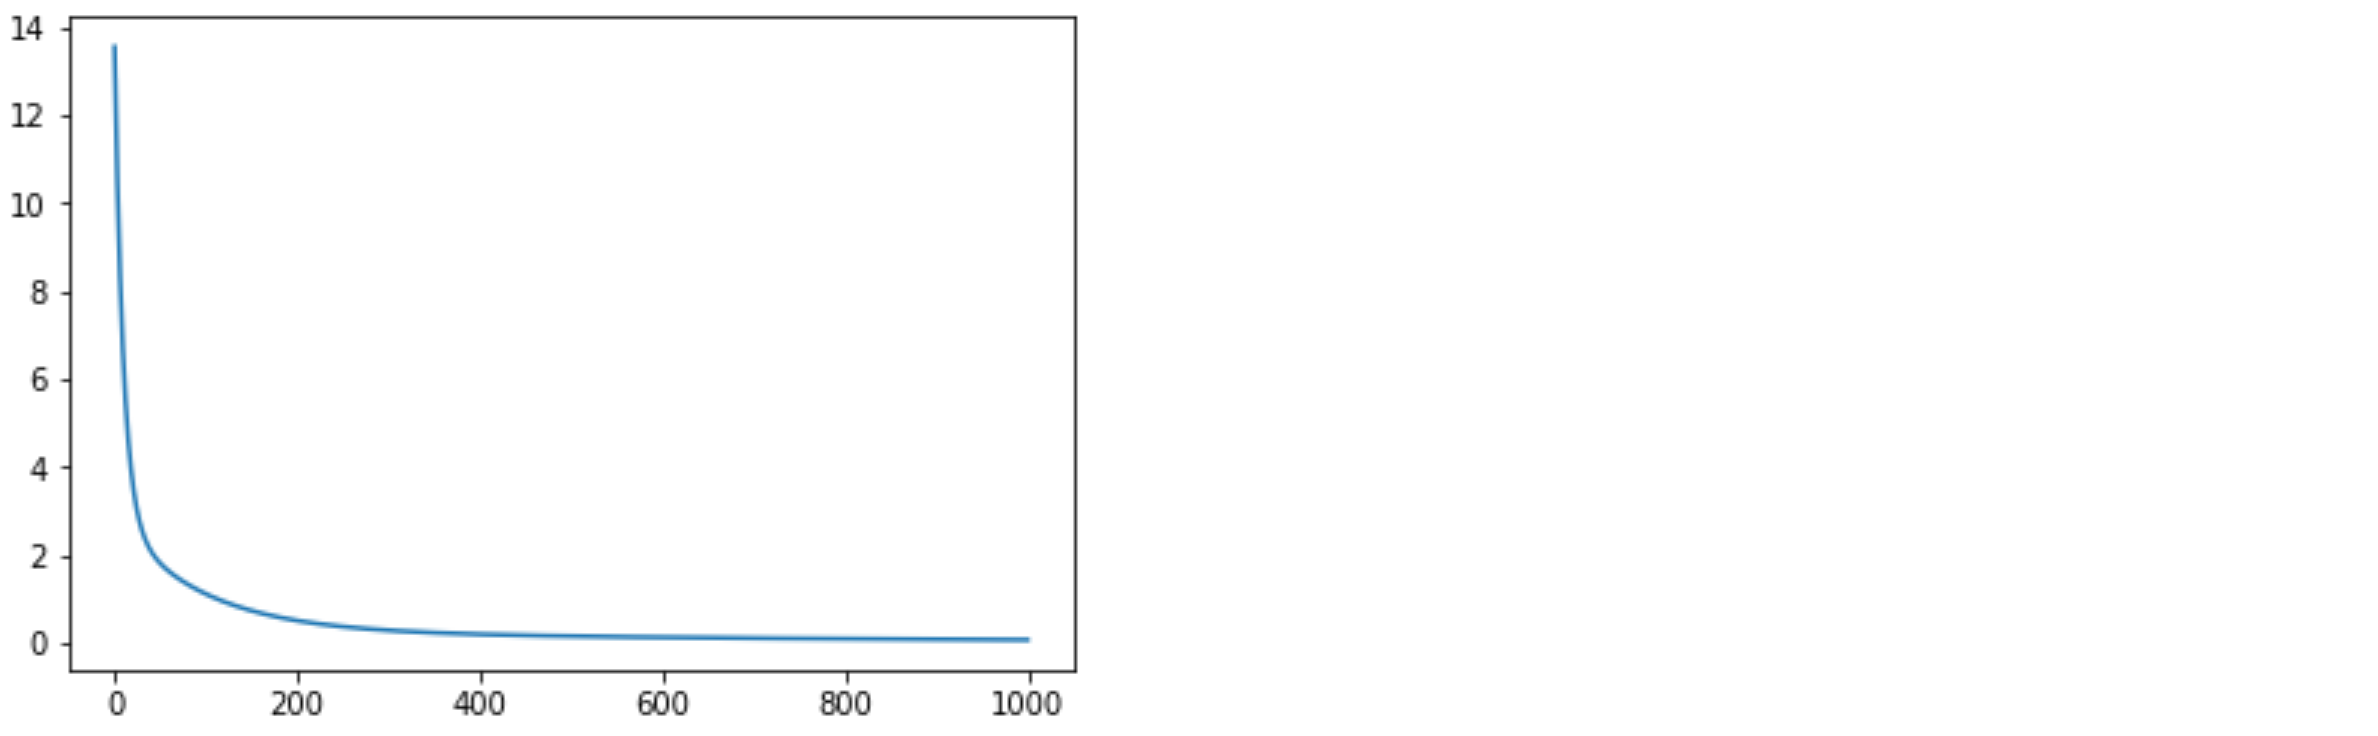


### Assignment 6:

Using the code of Assignment 4, write a function LinearRegression( ) that takes X, Y, and alpha (the learning rate) and returns the model or weights (W and b), and J (array consisting of the Cost Function values after each iteration similar as in Assignment 4). 

In [ ]:
def LinearRegression(X, Y, alpha):
# Reset the weights
    np.random.seed(500)
    W = np.random.rand(4).reshape(1,4)
    b = np.random.rand()

#-- START CODE HERE --# (≈ 2-7 lines of code)
    Ji = ComputeCostFunction(X, Y, W, b)
    Jf = 1 
    while abs(Ji-Jf) > 9.63e-5:
        dJdW, dJdb = ComputeDerivatives(X, Y, W, b)
        W, b = UpdateWeights(W, b, dJdW, dJdb, alpha)
        Jf = Ji
        Ji = ComputeCostFunction(X, Y, W, b)
        J.append(Ji)
#-- END CODE HERE --#
    return W, b, J

In [ ]:
# TESTING:

# Set Learning Rate
alpha = 0.001

W, b, J = LinearRegression(X, Y, alpha)
print("w\u2081:", W[0][0])
print("w\u2082:", W[0][1])
print("w\u2083:", W[0][2])
print("w\u2084:", W[0][3])
print("b:", b[0][0])


##### You should get the following results:

w₁: -0.1040943282483786   
w₂: 0.4393418484190863   
w₃: -0.1896114070690207   
w₄: 0.28277792248014616   
b: -0.07442209324615198  
   
